# Data Analysis Pipeline

This is an interactive notebooke we will be using to run our analysis. This environment is very similar to other python IDEs so I will not be going over its use. If you need help, just message me on Slack and we can work together!


We will be using the following pipeline. Now, there are many ways to have a "proper" pipeline and there are drawbacks to each choice. I want you to think about potential "problems" in the data and different ways we can "solve" them computationally. TLDR: There is no one true or best way to have a data analysis pipeline --> They all have drawbacks.  

As this is a fairly dense topic, along the way I will have readings for each section so you can understand what is happening at each step and what you need to do!

This is very dense so please reach out to me as problems or confusion arises.


### About the data
There data we will be analyzing can be found [here](https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv)

However, please use the version I provided you with. This link is just provided so that you can read about the data and what each variable means.

### Summary of Data Analysis Pipeline

Below is a summary of the minimum steps needed in a data analysis pipeline. In reality, there is a lot more iterative analysis but we are trying to just cover the basics. Right now I think that we will aim to do a decision tree because it is fairly easy to understand and to explain to others.

1. Data Loading and Cleaning
2. Feature Selection for decision tree
3. Choosing a model and model tuning (involves cross validation or validation set)
4. Summarizing the model and explaining what we don't know. This involves metrics for quantifying how good the model is.




In [ ]:
#Imports

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: Data Loading and Cleaning

Here are the main steps of data cleaning and loading that we need to do!

- Examine Data
- Remove Outliers
- Deal with Missing Data
- Encode the data
- Normalization

These are the minimum steps that must be done before any analysis starts!

#### Examining the Data

One important way to understand data is data types. To understand data types read [this](https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689)

In the next cell I have code to load the data.

**IMPORTANT** You have to add the data to the notebook before every session. Click on the folder in the sidebar and drag in the csv I provided.

In [ ]:
#Load

df_raw = pd.read_csv('heart_disease_missing.csv')


#These are data types see reading!
bins = ['sex', 'fbs', 'exang']
cats = ['cp', 'restecg', 'slope', 'thal']
ords = ['ca']
nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']



To first examine the data we will look at the top of the data using the head() function.

In [ ]:
df_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,NaN,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


We can also get a lot of insight using the describe function! Recall what you learned about mean, standard deviation, minimum, maxiumum and quantiles.

**TODO: Make note of which columns have missing values, and other interesting features!**

In [ ]:
df_raw.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,241.000000,242.000000,241.000000,242.000000,242.000000,242.000000,242.000000,241.000000,242.000000,242.000000,242.000000
mean,54.256198,0.661157,0.991736,131.834025,241.495868,0.145228,0.549587,149.896694,0.305785,1.095455,1.398340,0.665289,2.285124,0.553719
std,9.116606,0.474297,1.046598,16.883592,48.517204,0.353064,0.530814,22.469566,0.461694,1.196095,0.638225,0.950842,0.615587,0.498136
min,34.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,207.250000,0.000000,0.000000,136.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,235.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,166.750000,1.000000,1.750000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,194.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Outlier detection

Outliers can be detected by looking at histograms. Do some values look like outliers, why or why not?

**TODO: Make a histogram for all of the variables. For each column explain what you see and why there is or isn't outlier!**


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01f0464710>]],
      dtype=object)

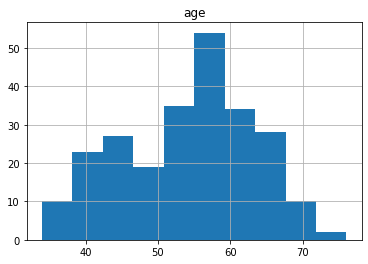

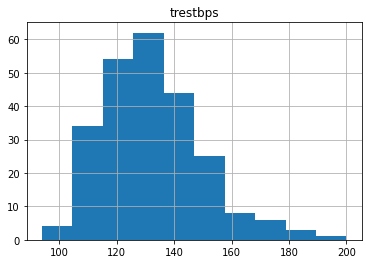

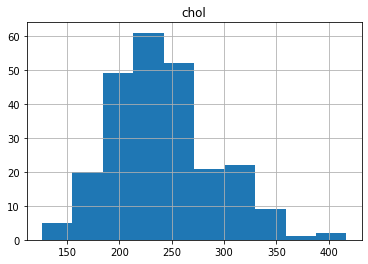

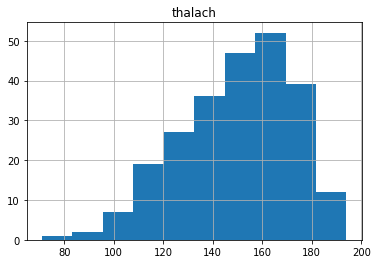

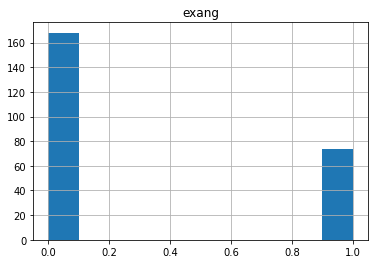

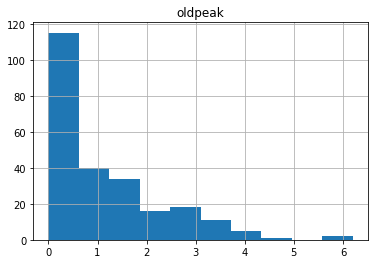

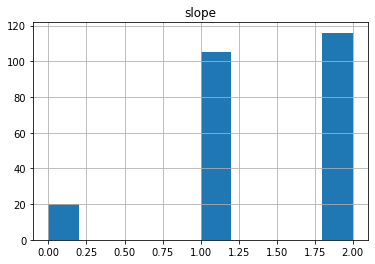

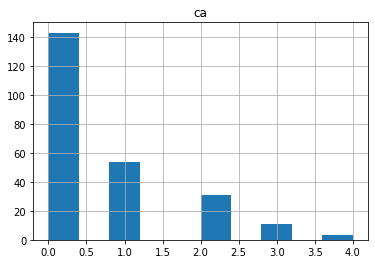

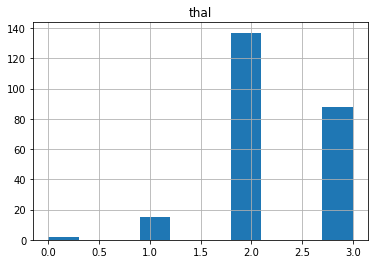

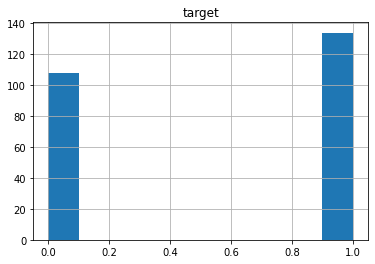

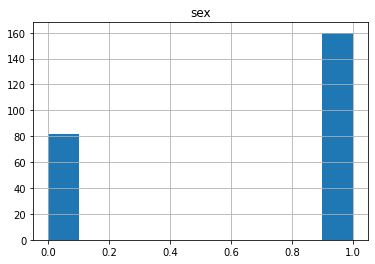

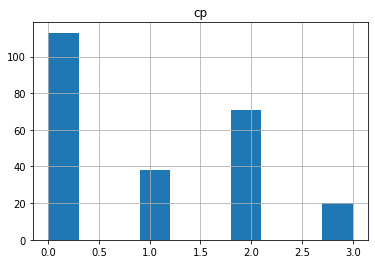

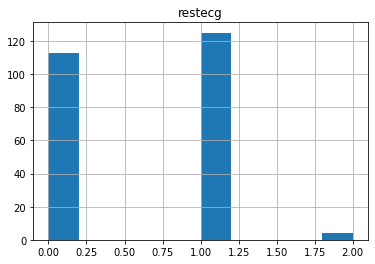

In [ ]:
### TODO: Make a histograms

print(df_raw.columns)

df_raw.hist(column='age')
df_raw.hist(column='trestbps')
df_raw.hist(column='chol')
df_raw.hist(column='thalach')
df_raw.hist(column='exang')
df_raw.hist(column='oldpeak')
df_raw.hist(column='slope')
df_raw.hist(column='ca')
df_raw.hist(column='thal')
df_raw.hist(column='target')

df_raw.hist(column='sex')
df_raw.hist(column='cp')
df_raw.hist(column='restecg')




**TODO: Explain what you learned from the data examination and about what different data types are! If there were outliers also remove them! **

#### Missing Data



**TODO: Recall which columns have missing data from above! We have several option to fill in out missing data. You learned about this in the data cleaning modules so please apply that here and justify your decision.There are not necessarily right or wrong answers.**


In [ ]:
#Do the question above!

df_raw.isna().sum()
#df_raw.interpolate()

df_interpolated = df_raw.interpolate(method ='linear', limit_direction ='forward')
#df_interpolated
df_interpolated.isna().sum()



#Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
# Reference: https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Other method Imputation
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(weights="uniform")
# imputed = imputer.fit_transform(df_raw)
# df_interpolated = pd.DataFrame(imputed)
# df_interpolated.columns = df_raw.columns
# df_interpolated['cp'].unique()

#### One hot encoding

Categorical Variables even when represented by numbers do not really have an order! So we have to give them their own columns to prevent the algorithms from treating them like continuous or numeric variables!  Therefore we will use a technique called one-hot-encoding to fix this!

You have not covered this technique yet but you can read about it [here](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/).

I am trying to provide less and less guidance as you go so you can work on your coding and reading documentation skills! This can be challenging so of course reach out if you need help!

**TODO: Follow the tutorial above to one hot encode the categorial variables!**



In [ ]:
#TODO: one hot encode your variables

cats = ['cp', 'restecg', 'slope', 'thal']

#Make copy just to not delete previous df
df_encoded = df_interpolated.copy()

#Round all categorical features! (we might have interpolated it a certain way!)
df_encoded.restecg = df_encoded.restecg.round(decimals=0)
df_encoded.slope = df_encoded.slope.round(decimals=0)
df_encoded.cp = df_encoded.cp.round(decimals=0)
df_encoded.thal = df_encoded.thal.round(decimals=0)


# Also round ca because it is only intergets
df_encoded.ca = df_encoded.ca.round(decimals=0)


#Function From: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def encode_and_bind(original_dataframe, feature_to_encode):
  dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
  res = pd.concat([original_dataframe, dummies], axis=1)
  return(res)

# # simple numeric encoding the categorical variables, the function above works for strings!
df_encoded.cp = df_encoded.cp.replace({0:'Asympt.', 1:'Atypical', 2:'Non', 3:'Typical'})
df_encoded.restecg = df_encoded.restecg.replace({0:'LV hyper', 1:'Normal', 2:'ST-T wave'})
df_encoded.slope = df_encoded.slope.replace({0:'down', 1:'up', 2:'flat'})
df_encoded.thal = df_encoded.thal.replace({0:'NA', 1:'Fixed', 2:'Normal', 3:'Reverse'})

#Encode each
df_encoded = encode_and_bind(df_encoded, 'cp')
df_encoded = encode_and_bind(df_encoded, 'restecg')
df_encoded = encode_and_bind(df_encoded, 'slope')
df_encoded = encode_and_bind(df_encoded, 'thal')

#Remove old columns
df_encoded.drop(['cp', 'restecg', 'slope', 'thal'], inplace=True, axis=1)
df_encoded.head()

# eg. change chest pain into 4 different binary vars.
# 3, 2, 1, 1, 0
# cp_0, cp_1, cp_2, cp_3
# 0, 0, 0, 1
# 0, 0, 1, 0
# 0, 1, 0, 0
# 1, 0, 0, 0


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_Asympt.,cp_Atypical,cp_Non,cp_Typical,restecg_LV hyper,restecg_Normal,restecg_ST-T wave,slope_down,slope_flat,slope_up,thal_Fixed,thal_NA,thal_Normal,thal_Reverse
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1.0,0,0,0,1,1,0,0,1,0,0,1,0,0,0
1,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,1.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,1.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,57.0,0.0,130.0,354.0,0.0,163.0,1.0,0.6,0.0,1.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0


#### Normalization

We will cover 2 types of normalization, min-max and z-score.

1. Read (this)[https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff] which tells you why we normalize. Also read [this](https://www.codecademy.com/articles/normalization) to learn about z-score normalization
2. Read the documentation from sklearn for (min-max)[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] and (z-score)[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html] normalization

If you get stuck try reading (this)[https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475]

**TODO: normalize all the data with both z-score and with min-max. Think about which method of normalizing is better and write about which one you will pick to use for your analysis**

In [ ]:
# TODO: Do above

from sklearn.preprocessing import MinMaxScaler, StandardScaler #StandardScaler is another word for z-score

toNorm = df_encoded[df_encoded.columns.drop('target')]

#Adapted from: https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475
mm_scaler_ = MinMaxScaler()
df_minmax = pd.DataFrame(mm_scaler_.fit_transform(toNorm), columns=toNorm.columns)
df_minmax['target'] = df_encoded['target']
df_minmax



,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_Asympt.,cp_Atypical,cp_Non,cp_Typical,restecg_LV hyper,restecg_Normal,restecg_ST-T wave,slope_down,slope_flat,slope_up,thal_Fixed,thal_NA,thal_Normal,thal_Reverse,target
0,0.690476,1.0,0.481132,0.367698,1.0,0.642276,0.0,0.370968,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.071429,1.0,0.339623,0.426117,0.0,0.943089,0.0,0.564516,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.166667,0.0,0.339623,0.268041,0.0,0.821138,0.0,0.225806,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.523810,1.0,0.245283,0.378007,0.0,0.869919,0.0,0.129032,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.547619,0.0,0.339623,0.783505,0.0,0.747967,1.0,0.096774,0.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.547619,0.0,0.433962,0.395189,0.0,0.422764,1.0,0.032258,0.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
239,0.261905,1.0,0.150943,0.474227,0.0,0.495935,0.0,0.193548,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
240,0.809524,1.0,0.471698,0.230241,1.0,0.569106,0.0,0.548387,0.50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
241,0.547619,1.0,0.339623,0.017182,0.0,0.357724,1.0,0.193548,0.25,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Standard scaling
std_scaler = StandardScaler()
df_zscore = pd.DataFrame(std_scaler.fit_transform(toNorm), columns=toNorm.columns)
df_zscore['target'] = df_encoded['target']
df_zscore

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_Asympt.,cp_Atypical,cp_Non,cp_Typical,restecg_LV hyper,restecg_Normal,restecg_ST-T wave,slope_down,slope_flat,slope_up,thal_Fixed,thal_NA,thal_Normal,thal_Reverse,target
0,0.964443,0.718601,0.787422,-0.175449,2.437798,0.001837,-0.668153,1.012774,-0.698983,-0.932325,-0.430541,-0.648886,3.339162,1.063757,-1.029234,-0.129369,3.339162,-0.971597,-0.872278,3.898718,-0.091098,-1.146423,-0.753487,1.0
1,-1.898301,0.718601,-0.101170,0.176386,-0.410206,1.653786,-0.668153,2.019678,-0.698983,-0.932325,-0.430541,1.541104,-0.299476,-0.940064,0.971597,-0.129369,3.339162,-0.971597,-0.872278,-0.256495,-0.091098,0.872278,-0.753487,1.0
2,-1.457879,-1.398006,-0.101170,-0.775640,-0.410206,0.984077,-0.668153,0.257596,-0.698983,-0.932325,2.322657,-0.648886,-0.299476,1.063757,-1.029234,-0.129369,-0.299476,1.029234,-0.872278,-0.256495,-0.091098,0.872278,-0.753487,1.0
3,0.193704,0.718601,-0.693565,-0.113361,-0.410206,1.251961,-0.668153,-0.245856,-0.698983,-0.932325,2.322657,-0.648886,-0.299476,-0.940064,0.971597,-0.129369,-0.299476,1.029234,-0.872278,-0.256495,-0.091098,0.872278,-0.753487,1.0
4,0.303810,-1.398006,-0.101170,2.328794,-0.410206,0.582252,1.496663,-0.413673,-0.698983,1.072587,-0.430541,-0.648886,-0.299476,-0.940064,0.971597,-0.129369,-0.299476,1.029234,-0.872278,-0.256495,-0.091098,0.872278,-0.753487,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.303810,-1.398006,0.491225,-0.009880,-0.410206,-1.203639,1.496663,-0.749308,-0.698983,1.072587,-0.430541,-0.648886,-0.299476,-0.940064,0.971597,-0.129369,-0.299476,-0.971597,1.146423,-0.256495,-0.091098,-1.146423,1.327164,0.0
239,-1.017457,0.718601,-1.285960,0.466134,-0.410206,-0.801813,-0.668153,0.089779,-0.698983,-0.932325,-0.430541,-0.648886,3.339162,-0.940064,0.971597,-0.129369,-0.299476,-0.971597,1.146423,-0.256495,-0.091098,-1.146423,1.327164,0.0
240,1.514971,0.718601,0.728182,-1.003299,2.437798,-0.399988,-0.668153,1.935769,1.410991,1.072587,-0.430541,-0.648886,-0.299476,-0.940064,0.971597,-0.129369,-0.299476,-0.971597,1.146423,-0.256495,-0.091098,-1.146423,1.327164,0.0
241,0.303810,0.718601,-0.101170,-2.286464,-0.410206,-1.560817,1.496663,0.089779,0.356004,1.072587,-0.430541,-0.648886,-0.299476,-0.940064,0.971597,-0.129369,-0.299476,-0.971597,1.146423,-0.256495,-0.091098,-1.146423,1.327164,0.0


**TODO: This is a very minimal pipeline, using what you know so far explain what else could we do to clean the data? What different methods might you choose for the steps we did do and why? **

### Step 2: Feature Selection


Feature selection is one of the most important steps. Assumptions met or not met here can entirely change your results!

Read [this](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)

Finish these kaggle modules:
1. (Intermediate Machine Learning)[https://www.kaggle.com/learn/intermediate-machine-learning]
2. (Feature Engineering)[https://www.kaggle.com/learn/feature-engineering]


I am providing less and less guideance so you can really get practise with actually making important decisions in your pipeline. Do your best to choose the features from your normalized and cleaned data that you think will make sense for our question. Explain yourself as you go, and justify your answers.

One important concept is correlation. You can read about it [here](https://medium.com/analytics-vidhya/what-is-correlation-4fe0c6fbed47).

**TODO: Explain why correlation matters, what does it mean for our model? **

GridCV --> automatically uses all variables to get a good model https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



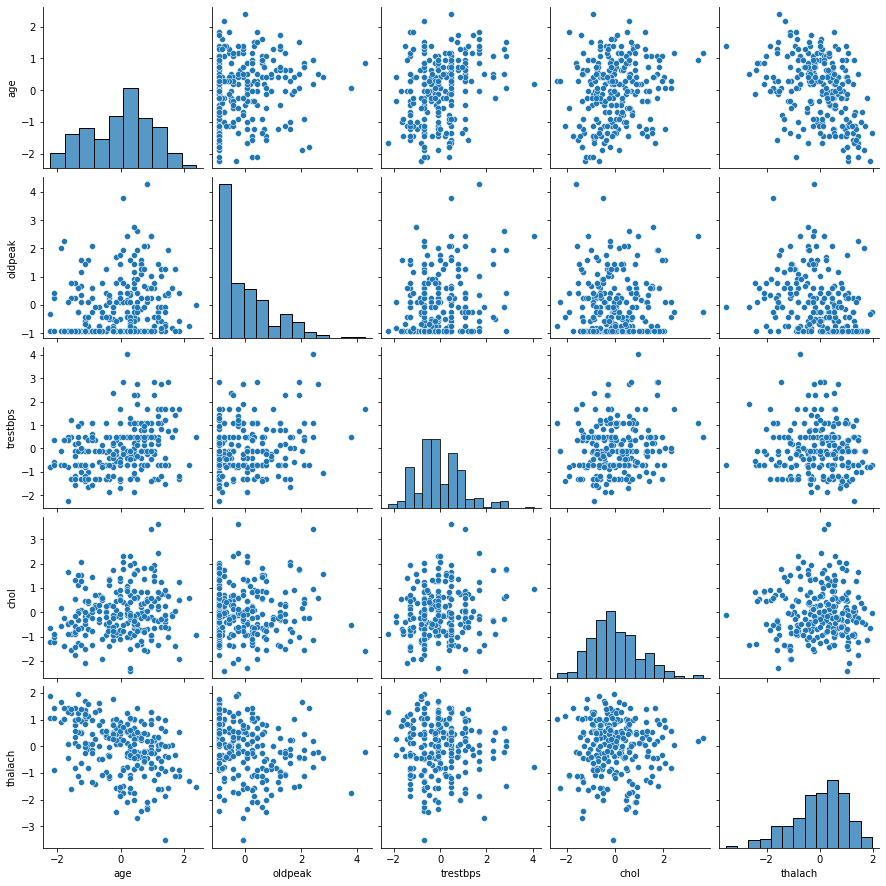

In [ ]:
#Example of correlation plot
sns.pairplot(df_zscore[nums])

In [ ]:
#Example of correlation chart
df_zscore[nums].corr(method='pearson')

,age,oldpeak,trestbps,chol,thalach
age,1.000000,0.176795,0.308255,0.174017,-0.402742
oldpeak,0.176795,1.000000,0.221555,0.032524,-0.323055
trestbps,0.308255,0.221555,1.000000,0.146195,-0.045169
chol,0.174017,0.032524,0.146195,1.000000,-0.010572
thalach,-0.402742,-0.323055,-0.045169,-0.010572,1.000000


Now we will use Variance inflation factor to check for multi-collinearity

Interpreting VIF:
- https://www.statisticshowto.com/variance-inflation-factor/

Conceptual:
- Multi-collinearity: https://en.wikipedia.org/wiki/Multicollinearity
- VIF: https://en.wikipedia.org/wiki/Variance_inflation_factor


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

#Reading https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4
calc_vif(df_zscore[df_zscore.columns.drop('target')])



/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,age,1.520424
1,sex,1.300096
2,trestbps,1.279814
3,chol,1.137202
4,fbs,1.214299
5,thalach,1.683830
6,exang,1.568929
7,oldpeak,1.927428
8,ca,1.204776
9,cp_Asympt.,inf


**TODO: Use the feature engineering module learning to choose good features for this dataset.  **

### Step 3: Making a Model

This is the final set of steps! Great work so far! What is above here is the "methods" section of the report. From here on it will be "results"

First we need to split up the data so we can test the final model on data we haven't used to train!

In the next steps we separate the target and the features. We call the target y and the features X.

In [ ]:
X = df_zscore[df_zscore.columns.drop('target')]
y = df_zscore['target']

Next, we split up the set again to have some data we withhold for testing and some data we keep for training! This way we don't "overfit".

We arbitrarily take 80% for training and 20% for testing. We have a random state at 98 so we get the same result everytime.

In [ ]:
# Make train and set set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=98)

Now we will make the default model. This is a baseline we are looking to improve

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

dt_default = DecisionTreeClassifier(random_state=0)
dt_default.fit(X_train, y_train)
predictions = dt_default.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79        21
         1.0       0.85      0.82      0.84        28

    accuracy                           0.82        49
   macro avg       0.81      0.82      0.81        49
weighted avg       0.82      0.82      0.82        49



Above is the classification report. There are a lot of new terms here but this is how we interpret it.

The classes are 0.0 or 1.0, recall 0 mean no heart disease and 1 means heart disease.

- The recall means "how many of this class you find over the whole number of element of this class"
- The precision will be "how many are correctly classified among that class"
- The f1-score is the harmonic mean between precision & recall
- The support is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset.

Precision, recall and accuracy (overall are more important)

[reference](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn)

In [ ]:
print(confusion_matrix(y_test, predictions))

[[17  4]
 [ 5 23]]


What we see above is the "confusion matrix" it tells us how good our model is and is a way to check how good the model is. Below is how you interpret.

[["True negative", "False positive"]]

["False negative", "True Positive"]]


A true negative means the real answer is negative and the model got negative. This is good!

A False positive means we got positive when the real answer was negative. This is bad!

A False negative means we got negative when the real answer was positive. This is bad!

A True positive means the real answer was true and the model got true! This is good!



Next, we will look at how our model made choices. I chose this model because it is easy to interpret.

In [ ]:
from sklearn.tree import export_text

feature_list = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_Asympt.', 'cp_Atypical', 'cp_Non', 'cp_Typical',
       'restecg_LV hyper', 'restecg_Normal', 'restecg_ST-T wave', 'slope_down',
       'slope_flat', 'slope_up', 'thal_Fixed', 'thal_NA', 'thal_Normal',
       'thal_Reverse']
text_representation = export_text(dt_default, feature_names=feature_list)
print(text_representation)

|--- thal_Normal <= -0.14
|   |--- ca <= -0.17
|   |   |--- cp_Asympt. <= 0.07
|   |   |   |--- trestbps <= -0.99
|   |   |   |   |--- age <= -0.36
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- age >  -0.36
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- trestbps >  -0.99
|   |   |   |   |--- age <= 1.24
|   |   |   |   |   |--- cp_Atypical <= 0.95
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- cp_Atypical >  0.95
|   |   |   |   |   |   |--- age <= -0.41
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- age >  -0.41
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- age >  1.24
|   |   |   |   |   |--- class: 0.0
|   |   |--- cp_Asympt. >  0.07
|   |   |   |--- thal_Fixed <= 1.82
|   |   |   |   |--- oldpeak <= -0.37
|   |   |   |   |   |--- trestbps <= 0.34
|   |   |   |   |   |   |--- age <= -1.35
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- age >  -1.35
|   |   |   |   |   |   |   |--

We can interpret the above by seeing how the model makes each decision as it goes!

There are a lot of improvements on parameters in the decision tree that we can "tune" but we are skipping this for now. We could also refine which features we include more.

Interpreting the final model results is a key part of the final report!

Great work! This is your first machine learning model! :D